## In this notebook, we will be using PCA to reduce dimension of a dataset 

- we will load the data, 
- construct plots of the data
- compute variance
- compute eigenvalues and eigenvectors (Eigen-pairs)
- find the optimal number of eigenvalues
- find the projection matrix/matrix as a dataframe 
- transform our original data
- compute and explain the variance ratio
- use python built PCA to compute PCA

let's go....

In [114]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle
import pandas as pd
import plotly.express as px #finally my lost love lol
import seaborn as sns
%matplotlib inline 


# matplotlib inline to tell this darn pc to print



In [29]:
udemy_courses = pd.read_csv("3.1-data-sheet-udemy-courses-business-courses.csv")

In [32]:
udemy_courses.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance


In [34]:
udemy_courses.level.unique()

array(['All Levels', 'Beginner Level', 'Intermediate Level',
       'Expert Level', nan], dtype=object)

<AxesSubplot:>

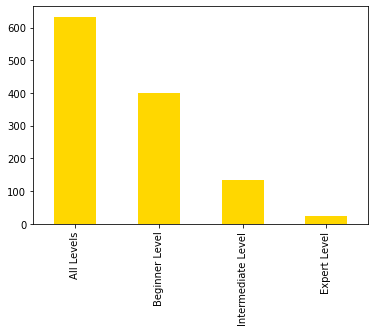

In [36]:
udemy_courses.level.value_counts().plot.bar(color="gold")

In [38]:
udemy_courses.isna().sum()

course_id              1
course_title           1
url                    1
price                  1
num_subscribers        1
num_reviews            1
num_lectures           1
level                  1
Rating                 0
content_duration       1
published_timestamp    1
subject                1
dtype: int64

In [39]:
udemy_courses.dropna(inplace=True)

In [40]:
udemy_courses.isna().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [41]:
udemy_courses.shape

(1191, 12)

In [43]:
udemy_courses.dtypes

course_id              float64
course_title            object
url                     object
price                  float64
num_subscribers        float64
num_reviews            float64
num_lectures           float64
level                   object
Rating                 float64
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

lets drop some categorical variables for our project as it only takes numerical continuous variables?

In [44]:
udemy_courses.drop(["course_title", "url", "published_timestamp", "subject", "level"], axis=1, inplace=True)

let's construct the 3D plot 

In [127]:

%matplotlib inline

plt.figure(figsize=(10,7))
fig = px.scatter_3d(udemy_courses, x = "num_lectures", y="price", z="num_subscribers", color= "num_reviews")
fig.update_traces(marker = dict(size=13, line=dict(width=1, color='green')),
                 selector=dict(mode='markers'))

plt.show()
#print(fig)
fig.show()

<Figure size 720x504 with 0 Axes>

### Now let's build a function to scale the data 

In [61]:
import numpy as np
def StandardScaler(data):
    scaled_df =(data-np.mean(data,axis=0))/np.std(data,axis=0)
    return scaled_df


In [65]:
scaled_udemy_data = StandardScaler(udemy_courses)
scaled_udemy_data = np.around(scaled_udemy_data,3) #evenly round to decimal 3
scaled_udemy_data

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
0,-1.706,-1.066,16.342,3.694,-0.186,-0.439,0.783
1,-1.709,-1.066,14.065,18.353,-0.362,0.874,-0.363
2,-1.465,-1.066,12.583,11.157,-0.384,0.739,-0.363
3,-1.413,-1.066,7.046,5.926,-0.538,-1.718,-0.363
4,0.018,1.961,5.850,9.670,3.111,-1.078,1.136
...,...,...,...,...,...,...,...
1186,0.699,-0.445,-0.401,-0.270,-0.318,0.874,-0.275
1187,1.696,0.098,-0.401,-0.270,-0.516,0.874,-0.187
1188,1.193,0.331,-0.401,-0.270,-0.450,-1.112,-0.451
1189,1.773,-0.290,-0.401,-0.270,-0.516,-1.819,-0.275


### Now lets build a function to compute the covariance matrix

In [75]:
np.around(scaled_udemy_data.cov(), 2)

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
course_id,1.00,0.19,-0.20,-0.13,-0.02,0.02,-0.08
price,0.19,1.00,-0.02,0.07,0.26,-0.03,0.17
num_subscribers,-0.20,-0.02,1.00,0.79,0.06,-0.05,0.02
num_reviews,-0.13,0.07,0.79,1.00,0.11,-0.06,0.06
num_lectures,-0.02,0.26,0.06,0.11,1.00,-0.02,0.81
Rating,0.02,-0.03,-0.05,-0.06,-0.02,1.00,-0.01
content_duration,-0.08,0.17,0.02,0.06,0.81,-0.01,1.00


In [72]:
def CovarianceCompute(df):
    length_data = df.shape[0]
    covariance = df.T.dot(df)/length_data
    return covariance

In [73]:
covar_mat = CovarianceCompute(scaled_udemy_data)
covar_mat = np.around(covar_mat, 3)
covar_mat

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
course_id,1.000,0.188,-0.201,-0.131,-0.019,0.022,-0.081
price,0.188,1.000,-0.015,0.065,0.259,-0.025,0.173
num_subscribers,-0.201,-0.015,1.000,0.788,0.055,-0.047,0.020
num_reviews,-0.131,0.065,0.788,1.000,0.106,-0.064,0.055
num_lectures,-0.019,0.259,0.055,0.106,1.000,-0.024,0.809
Rating,0.022,-0.025,-0.047,-0.064,-0.024,1.000,-0.011
content_duration,-0.081,0.173,0.020,0.055,0.809,-0.011,1.000


## Now let's find the Eigenvectors and Eigenvalues

we will use the linalg.eig and parse in a tuple to a variable eigenvalue and eigenvectors, the order is a must

ask question about graph

In [76]:
eigenvalues, eigenvectors = np.linalg.eig(covar_mat)

#### Now we want to print out the index that carries our maximum eigenvector value

In [78]:
eigenvectors.argmax()

19

In [129]:
eigenvectors

array([[-0.1512937 , -0.23830013,  0.69112978, -0.09579119,  0.65455493,
         0.05809448,  0.04086332],
       [ 0.22106547, -0.25569478,  0.61549608, -0.03669424, -0.70611416,
         0.05685703,  0.06114257],
       [ 0.41493299,  0.54243711,  0.11925325, -0.09099005,  0.09462836,
         0.70676081, -0.05125126],
       [ 0.44476136,  0.49652027,  0.2132882 , -0.08242759,  0.10199997,
        -0.69545483,  0.09647473],
       [ 0.53865147, -0.40606891, -0.11660007, -0.00728309,  0.14821258,
        -0.05727481, -0.71138361],
       [-0.07431151, -0.05470341, -0.11723901, -0.98708846, -0.05607083,
        -0.01462978, -0.00622449],
       [ 0.51243596, -0.41131303, -0.23759303, -0.00272109,  0.16879337,
         0.08203417,  0.69032769]])

#### Now we need to sort our eigenvalues so that the biggest ones comes first 
to begin the process of finding the optimal eigenvalues

In [80]:
indexs = eigenvalues.argsort()[::-1] # whats the meaning of this last term?

In [85]:
indexs[1]

1

#### now we will change our eigenvectors to a dataframe, why?

In [86]:
eigenvectors_df = pd.DataFrame(eigenvectors)

In [130]:
eigenvectors_df

,0,1,2,3,4,5,6
0,-0.151294,-0.238300,0.691130,0.654555,-0.095791,0.058094,0.040863
1,0.221065,-0.255695,0.615496,-0.706114,-0.036694,0.056857,0.061143
2,0.414933,0.542437,0.119253,0.094628,-0.090990,0.706761,-0.051251
3,0.444761,0.496520,0.213288,0.102000,-0.082428,-0.695455,0.096475
4,0.538651,-0.406069,-0.116600,0.148213,-0.007283,-0.057275,-0.711384
5,-0.074312,-0.054703,-0.117239,-0.056071,-0.987088,-0.014630,-0.006224
6,0.512436,-0.411313,-0.237593,0.168793,-0.002721,0.082034,0.690328


In [100]:
indexes = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indexes]
eigenvectors = eigenvectors[:,indexs]
sorted_eig_pairs = [(np.round(np.abs(eigenvalues[i]), 3),
                    eigenvectors[:,i]) for i in range(len(eigenvalues))]

print ('\n Sorted Eign-pair(descending order)')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])
    
print("\nTotal Variance (Sum of all the Eign Values :", round(sum(sorted_eigenValues), 3))


 Sorted Eign-pair(descending order)
eigenvec_1 : 2.014
eigenvec_2 : 1.765
eigenvec_3 : 1.12
eigenvec_4 : 0.991
eigenvec_5 : 0.721
eigenvec_6 : 0.206
eigenvec_7 : 0.183

Total Variance (Sum of all the Eign Values : 7.0


In [139]:
sorted_eig_pairs

[(2.014,
  array([-0.1512937 ,  0.22106547,  0.41493299,  0.44476136,  0.53865147,
         -0.07431151,  0.51243596])),
 (1.765,
  array([-0.23830013, -0.25569478,  0.54243711,  0.49652027, -0.40606891,
         -0.05470341, -0.41131303])),
 (1.12,
  array([ 0.69112978,  0.61549608,  0.11925325,  0.2132882 , -0.11660007,
         -0.11723901, -0.23759303])),
 (0.991,
  array([-0.09579119, -0.03669424, -0.09099005, -0.08242759, -0.00728309,
         -0.98708846, -0.00272109])),
 (0.721,
  array([ 0.65455493, -0.70611416,  0.09462836,  0.10199997,  0.14821258,
         -0.05607083,  0.16879337])),
 (0.206,
  array([ 0.05809448,  0.05685703,  0.70676081, -0.69545483, -0.05727481,
         -0.01462978,  0.08203417])),
 (0.183,
  array([ 0.04086332,  0.06114257, -0.05125126,  0.09647473, -0.71138361,
         -0.00622449,  0.69032769]))]

### Now we will use the Kaiser's method to get the optimal number of Eignvalues

In [103]:
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0]>0.2]
print("\nAccording to Kaiser's Stopping rule : ")
print("Number of PCs to be considered for PCA is : {}".format(str(len(best_eig_pairs))))
print("Their EignValues are : {}".format(str(best_eig_pairs)))


According to Kaiser's Stopping rule : 
Number of PCs to be considered for PCA is : 6
Their EignValues are : [2.014, 1.765, 1.12, 0.991, 0.721, 0.206]


In [104]:
best_eig_pairs

[2.014, 1.765, 1.12, 0.991, 0.721, 0.206]

### Now let us plot the EignValues 



In [111]:
len(sorted_eigenValues)

7

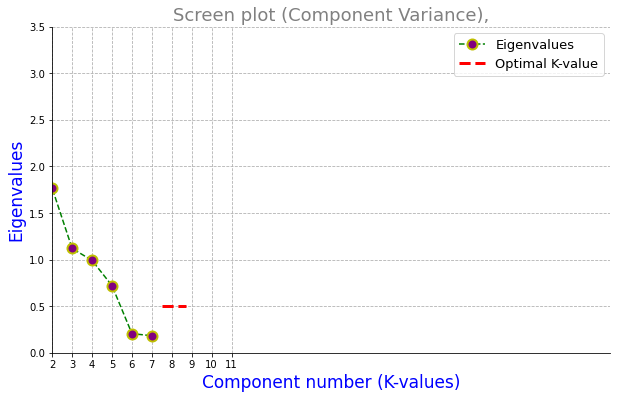

In [122]:
fig=plt.figure(figsize=(10,6))
plt.title("Screen plot (Component Variance),", color="grey", fontsize=18)
plt.xticks(np.arange(1,12,1))
plt.xlim(2, 30)
plt.ylim(0, 3.5)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle ='--')
plt.plot(range(1, 8), sorted_eigenValues, linestyle='--', label = "Eigenvalues", markerfacecolor="purple",
        markeredgecolor = 'y', markeredgewidth=2, marker='o', markersize=10, color='g')
plt.plot([7.5, 8.7], [0.5, 0.5], color='red', linestyle='--', lw=3, label = "Optimal K-value")
plt.legend(loc=1, prop={"size": 13})
sns.despine()

### fix the above code later

In [105]:
plt.plot??

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,